In [3]:
import sys

from evoman.environment import Environment
from demo_controller import player_controller

# imports other libs
import numpy as np
import os

from parallel_generalist import run as run_parallel
from transfer_generalist import run as run_transfer

def get_results(algorithm, gens):

    means = []
    bests =[]
    div = []
    pops = []
    envs = []

    for i in range(10):
        run_results, pop, env = algorithm(gens=gens)
        
        means.append(run_results['mean'])
        bests.append(run_results['best'])
        div.append(run_results['div'])
        pops.append(pop)
        envs.append(env)

    return means, bests, div, pops, envs






pygame 2.5.1 (SDL 2.28.2, Python 3.9.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
p_means, p_bests, p_div, p_pops, p_envs = get_results(run_parallel, gens=50)


In [4]:
t_means, t_bests, t_div, t_pops, t_envs = get_results(run_transfer, gens=50)



MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 2

current enemy: 2

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########

 GENERATION 0 92.572379 7.034507 28.614412
Initial mutation rate: 0.2
diversity 26.30270361175373
Mutation rate increased to 0.22000000000000003 at diversity 26.30270361175373
Mutation rate at generation 1: 0.22000000000000003
Gen 1 - Best: 92.57237888630937 - Mean: 11.669051665151756
diversity 26.35945593954043
Mutation rate increased to 0.24200000000000005 at diversity 26.35945593954043
Mutation rate at generation 2: 0.24200000000000005
G

In [3]:
import dill

parallel_res = {
    'p_means': p_means,
    'p_bests': p_bests,
    'p_div': p_div,
    'p_pops': p_pops,
}

file_path = 'parallel_res.pkl'

with open(file_path, 'wb') as file:
    dill.dump(parallel_res, file)

print("Variables saved as pickle in", file_path)


Variables saved as pickle in parallel_res.pkl


In [4]:
transfer_res = {
    't_means': t_means,
    't_bests': t_bests,
    't_div': t_div,
    't_pops': t_pops,
}

file_path = 'transfer_res.pkl'

with open(file_path, 'wb') as file:
    dill.dump(transfer_res, file)

print("Variables saved as pickle in", file_path)

Variables saved as pickle in transfer_res.pkl


In [39]:
import dill


file_path = 'parallel_res.pkl'  # Change this to the actual file path

# Load the data from the pickle file
with open(file_path, 'rb') as file:
    loaded_data = dill.load(file)

# Retrieve the variables from the loaded data
p_means = loaded_data['p_means']
p_bests = loaded_data['p_bests']
p_div = loaded_data['p_div']
p_pops = loaded_data['p_pops']


In [11]:
# Find the enemy difficulty by sorting 
from parallel_generalist import evaluate_gain

import matplotlib.pyplot as plt

# gens = 30

m = 0
for i, mean in enumerate(p_means):
    v = np.max(mean)
    if v > m:
        m = v
        idx = i
print(idx)

best_pop = p_pops[idx]
best_env = p_envs[idx]

print(p_envs[0])
#r = evaluate_gain_all_enemies(best_pop, p_envs[idx])
# print(r)

# print(p_envs[idx])
# env.update_parameter("enemies", [enemy])
# evaluate_gain(best_pop)

best_env.update_parameter("multiplemode", "no")

scores = []
for enemy in range(1, 9):
    best_env.update_parameter("enemies", [enemy])
    r = evaluate_gain(best_env, best_pop)
    scores.append((enemy, np.mean(r)))

# sort scores by gain
order = sorted(scores, key=lambda x: x[1], reverse=True)
    
order 


1


NameError: name 'p_envs' is not defined

In [13]:
m = 0
for i, mean in enumerate(t_means):
    v = np.max(mean)
    if v > m:
        m = v
        idx = i
print(idx)

best_t_pop = t_pops[idx]
best_t_env = t_envs[idx]

5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


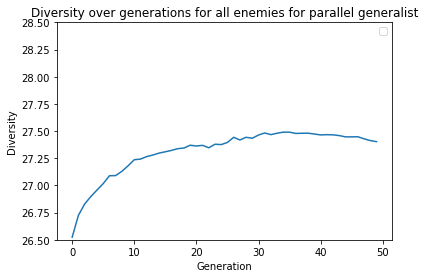

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Diversity')

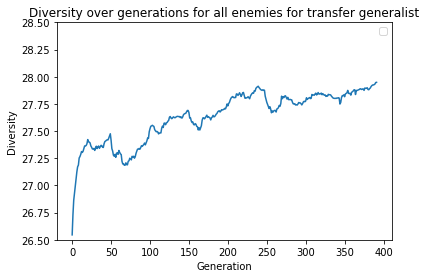

In [44]:
# for i in [1,2,4]:
#     plt.figure()
#     plt.plot(results_d[i]['div'], label='enhanced')
#     plt.plot(results_b[i]['div'], label='base')
#     plt.legend()
#     plt.title('Diversity over generations for enemy ' + str(i))

#     plt.xlabel('Generation')
#     plt.ylabel('Diversity')
# results_b[i]['div']
mean_p_div = np.mean(p_div, axis=0)

mean_t_div = np.mean([t_div[i][:392] for i in range(10)], axis=0)
plt.figure()

plt.plot(mean_p_div)
plt.title('Diversity over generations for all enemies for parallel generalist')
plt.legend()
plt.ylim([26.5, 28.5])
plt.xlabel('Generation')
plt.ylabel('Diversity')
plt.show()

plt.figure()
plt.plot(mean_t_div)
plt.legend()
plt.title('Diversity over generations for all enemies for transfer generalist')
plt.ylim([26.5, 28.5])

plt.xlabel('Generation')
plt.ylabel('Diversity')



In [14]:
from scipy.stats import ttest_ind
t_scores = []
for i in [1,2,4]:
    d = evaluate_gain(envs_d[i], pops_d[i])
    b = evaluate_gain(envs_b[i], pops_b[i])
    t_scores.append(ttest_ind(b, d))

NameError: name 'envs_d' is not defined

In [15]:
def hp_simulation(env, x):
    f, p, e, t = env.play(pcont=x)
    return p, e

def evaluate_hp(env, x):
    return np.array(list(map(lambda y: hp_simulation(env, y)[0], x))), np.array(list(map(lambda y: hp_simulation(env, y)[1], x)))



In [16]:
def generate_table(pop, env):
    table = np.zeros((2,8))
    for enemy in range(8):
        for run in range(5):
            env.update_parameter("enemies", [enemy+1])
            p, e = evaluate_hp(env, pop)
            table[0, enemy] = np.mean(p)
            table[1, enemy] = np.mean(e)
    return table

t_table = generate_table(best_t_pop, best_t_env)
p_table = generate_table(best_pop, best_env)

print(np.sum(t_table[1]))
print(np.sum(p_table[1]))


PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [2]


KeyboardInterrupt: 

In [23]:
best_env.play(best_pop[0])

(87.54110614572687, 34.60000000000027, 0, 372)

In [10]:
print(t_table)
print(p_table)

[[17.24   5.68   2.32   0.    71.656  0.     0.91   0.67 ]
 [14.3   55.1   48.9   73.1    8.7   86.1   78.2   66.   ]]
[[ 0.    60.34   0.12   0.    62.89   0.     0.992  6.132]
 [72.     1.6   51.7   68.8    0.    61.7   10.7   22.   ]]


In [34]:
# calculate average over p_means
p_means_avg = np.mean(p_means, axis=0)
p_bests_avg = np.mean(p_bests, axis=0)
p_means_std = np.std(p_means, axis=0)
p_bests_std = np.std(p_bests, axis=0)

# t_means_avg = np.mean(t_means[:][:400], axis=0)
# t_bests_avg = np.mean(t_bests[][:400], axis=0)
# t_means_std = np.std(t_means[:400], axis=0)
# t_bests_std = np.std(t_bests[:400], axis=0)


t_means_avg = np.mean([t_means[i][:392] for i in range(10)], axis=0)
t_bests_avg = np.mean([t_bests[i][:392] for i in range(10)], axis=0)
t_means_std = np.std([t_means[i][:392] for i in range(10)], axis=0)
t_bests_std = np.std([t_bests[i][:392] for i in range(10)], axis=0)
# t_means_avg = np.mean(t[:, :400], axis=0)
# print(t_means_avg.shape)


Text(0, 0.5, 'Fitness')

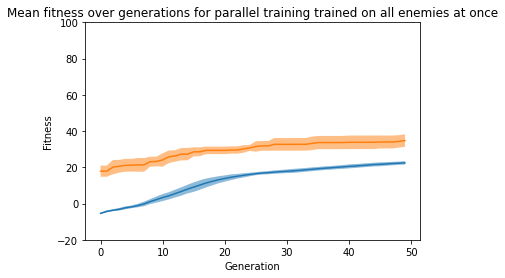

In [37]:
plt.figure()
plt.plot(p_means_avg, label='mean')
plt.plot(p_bests_avg, label='best')

plt.fill_between(range(len(p_means_avg)), p_means_avg-p_means_std, p_means_avg+p_means_std, alpha=0.5)
plt.fill_between(range(len(p_bests_avg)), p_bests_avg-p_bests_std, p_bests_avg+p_bests_std, alpha=0.5)
plt.ylim(-20, 100)

    
plt.title('Mean fitness over generations for parallel training trained on all enemies at once')
plt.xlabel('Generation')
plt.ylabel('Fitness')

Text(0, 0.5, 'Fitness')

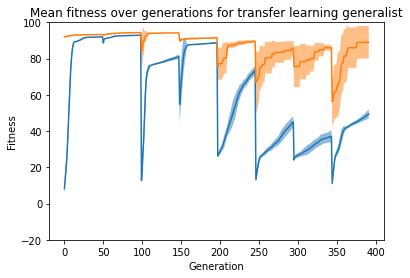

In [38]:
plt.figure()
plt.plot(t_means_avg, label='mean')
plt.plot(t_bests_avg, label='best')

plt.fill_between(range(len(t_means_avg)), t_means_avg-t_means_std, t_means_avg+t_means_std, alpha=0.5)
plt.fill_between(range(len(t_bests_avg)), t_bests_avg-t_bests_std, t_bests_avg+t_bests_std, alpha=0.5)

plt.ylim(-20, 100)
plt.title('Mean fitness over generations for transfer learning generalist')
plt.xlabel('Generation')
plt.ylabel('Fitness')

In [14]:
shp = np.array(t_means)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

In [15]:
gains = []

gain_p = np.zeros(100,)
gain_t = np.zeros(100,)
for _ in range(5):
    gain_p += evaluate_gain(best_env, best_pop)
    gain_t += evaluate_gain(best_t_env, best_t_pop)
    
gains.append(gain_p/5)
gains.append(gain_t/5)

Text(0.5, 1.0, 'individual gain for parallel learning and transfer learning for all enemies')

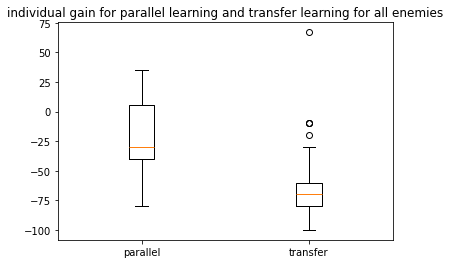

In [16]:
plt.boxplot(gains)
plt.xticks([1, 2], ["parallel", "transfer"])
plt.title('individual gain for parallel learning and transfer learning for all enemies')